# In Class Activity - Spotify Database - SQL Practice

<b>Instructor:</b> Melissa Laurino</br>
Spring 2025</br>

<b>Name:</b> Tara Jacobsen
</br>
<b>Date:</b> 22 Feb 2025
<br>
<br>

In [146]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation

In [147]:
# Set working directory (If needed)
import os
os.chdir('/Users/workschool/Documents/dssa-dg/DSSA/Assignments')

In [ ]:
# Print the columns in the database:

In [148]:
# Create a SQLite database and engine
db_file = "spotify_data.db"
engine = create_engine(f"sqlite:///{db_file}")

In [149]:
# Inspect the database to list the fields
inspector = inspect(engine)
columns = inspector.get_columns("spotify_history")
# Print column names
print("Columns in spotify_history table:")
for col in columns:
    print(col["name"], "-", col["type"])

Columns in spotify_history table:
ts - TEXT
platform - TEXT
ms_played - BIGINT
conn_country - TEXT
ip_addr - TEXT
master_metadata_track_name - TEXT
master_metadata_album_artist_name - TEXT
master_metadata_album_album_name - TEXT
spotify_track_uri - TEXT
episode_name - FLOAT
episode_show_name - FLOAT
spotify_episode_uri - FLOAT
audiobook_title - FLOAT
audiobook_uri - FLOAT
audiobook_chapter_uri - FLOAT
audiobook_chapter_title - FLOAT
reason_start - TEXT
reason_end - TEXT
shuffle - BOOLEAN
skipped - BOOLEAN
offline - BOOLEAN
offline_timestamp - FLOAT
incognito_mode - BOOLEAN
year - BIGINT


For practice, there are not multiple tables in this database. There is only one table named spotify_history.

Metadata for this database can be found here: https://github.com/MelissaLaurino/SpotifyStreamingHistory

We can use COUNT( * ) to summarize and count occurrences in SQL. Use COUNT( * ) below:

<b>Query 1:</b> <br>
Find the top 30 artists listened to in the year 2024.

In [150]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT master_metadata_album_artist_name AS artist,
                        SUM(ms_played) / 6000 AS minutes_played
                    FROM spotify_history
                    GROUP BY artist
                    ORDER BY minutes_played DESC
                    LIMIT 30
                    """)                      # SELECT artist name (FROM spotify hist) AS artist and convert ms to minutes
    # GROUP BY the artist and ORDER BY mins played, limiting to top 30
    top_artists = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
top_artists

,artist,minutes_played
0,Miley Cyrus,182615
1,Marian Hill,104027
2,Hozier,93339
3,Ariana Grande,72598
4,Noah Cyrus,68474
5,Lana Del Rey,67470
6,Nashville Cast,60764
7,Ed Sheeran,56812
8,Meghan Trainor,55093
9,Lady Gaga,51627


<b>Query 2:</b> <br>
Find the top 30 songs listened to in the year 2017.

In [151]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT master_metadata_track_name AS track,
                        SUM(ms_played) / 6000 AS minutes_played
                    FROM spotify_history
                    GROUP BY track
                    ORDER BY minutes_played DESC
                    LIMIT 30
                    """)                      # SELECT track name (FROM spotify hist) AS track and convert ms to minutes
    # GROUP BY the track and ORDER BY mins played, limiting to top 30
    top_tracks = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
top_tracks # Print the results

,track,minutes_played
0,When the Night is Over,16997
1,River,13132
2,Malibu,12830
3,Take Me to Church,10954
4,Fade Into You,9947
5,7 rings,9577
6,It Ain’t Me (with Selena Gomez),9458
7,White Blank Page,8566
8,All About That Bass,8191
9,Down,8095


<b>Query 3:</b> <br>
What are the top 5 albums played? <br>

In [152]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT master_metadata_album_album_name AS album,
                        SUM(ms_played) / 6000 AS minutes_played
                    FROM spotify_history
                    GROUP BY album
                    ORDER BY minutes_played DESC
                    LIMIT 5
                    """)                      # SELECT album name (FROM spotify hist) AS album and convert ms to minutes
    # GROUP BY the album and ORDER BY mins played, limiting to top 30 
    top_albums = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database
    
# Print the results
top_albums

,album,minutes_played
0,ACT ONE,50873
1,Hozier,35630
2,Waitress (Original Broadway Cast Recording),32348
3,Rainbow,28347
4,Bangerz (Deluxe Version),28330


In [153]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close() # Disconnect 

# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using R and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
- Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
- Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
- Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer the prompts in markdown cells. Justify your response. A simple yes/no answer will receive no credit.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [154]:
# Load necessary libraries
from sqlalchemy import create_engine, inspect, text # Database navigation
import pandas as pd # Python data manilpulation
import matplotlib.pyplot as plt # Graphing

In [155]:
# Connect to our .db file
db_path = "sql-murder-mystery.db"  # Define variable
engine = create_engine(f"sqlite:///{db_path}") # Use the create_engine function to connect to the database
engine # The f is the connection string, so if we print it we can see below

Engine(sqlite:///sql-murder-mystery.db)

In [156]:
# For a quick reference for tables and columns, refer to schema on Blackboard, or list the tables and fields below:
# List the tables in our database:
inspector = inspect(engine) # Define inspector as inspect engine
tables = inspector.get_table_names() # Get tables
tables # Print tables

['crime_scene_report',
 'drivers_license',
 'facebook_event_checkin',
 'get_fit_now_check_in',
 'get_fit_now_member',
 'income',
 'interview',
 'person',
 'solution']

We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a bar graph visual to support your recommendation.

In [160]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT type, COUNT(*) as count
                    FROM crime_scene_report
                    GROUP BY type
                    ORDER BY count DESC
                    """)         # SELECT crime type and COUNT the number of occurences in crime_scene_report
    # Group by type of crime
    df = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database. 
    # Save result as df

# Print the results
df

,type,count
0,murder,148
1,arson,148
2,assault,145
3,theft,141
4,bribery,135
5,robbery,134
6,fraud,130
7,blackmail,130
8,smuggling,117


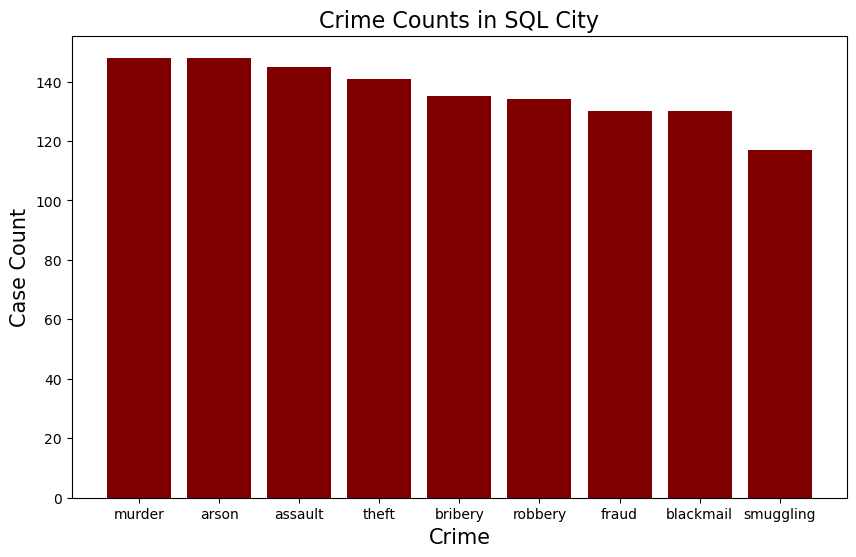

In [161]:
# Graph your results:

plt.figure(figsize=(10, 6))  # Set the plot size
plt.bar(df['type'], df['count'], color='maroon')  # Bar plot where x var is type and y var is count, color is maroon

# Add title and labels. Font size is adjusted because the labels were not easily distinguishable with the default
plt.title('Crime Counts in SQL City', fontsize = 16)
plt.xlabel('Crime', fontsize=15)
plt.ylabel('Case Count', fontsize=15)

plt.show() # Display

<b>Answer:</b> Murder and arson are tied for the top crime, so these are the crimes I would reccomend more training. However, I would note that assault, theft, bribery, robbery, fraud, and blackmail are not signifigantly less common than murder and arson. 

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

In [163]:
with engine.connect() as connection:  # Establish a connection
    query = text(""" SELECT
                strftime('%m', 
                
                substr(CAST(date AS TEXT), 1, 4) || '-' || 
                substr(CAST(date AS TEXT), 5, 2) || '-' || 
                substr(CAST(date AS TEXT), 7, 2))
                
                AS month, COUNT(*) as count
                FROM crime_scene_report
                GROUP BY month
                ORDER BY count DESC
                    """)                      # SELECT month as 2 digit integer from converted date integer from crime_scene_report in the following steps:
    # Cast is applied first. It changes the date column from int to string. Then, substr pulls out positions 1-4 (the year). Then, || '-' || adds a - at the end.  
    # Cast is applied first. It changes the date column from int to string. Then, substr pulls out positions 5-7 (the month). Then, || '-' || adds a - at the end.  
    # Cast is applied first. It changes the date column from int to string. Then, substr pulls out positions 7-9 (the day).
    # 3 strings are combinedat the || || step. Our result looks like 2018-01-15, for example. 
    # Then, the strftime('%m') function is extracting only the month from this string as a 2 digit integer. 
    # COUNT(*) occurences of each month as count. 
    # GROUP BY month and ORDER BY count desc
    dates = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database. 

# Print the results
dates

,month,count
0,01,179
1,04,159
2,03,147
3,02,134
4,06,89
5,11,88
6,09,85
7,10,75
8,05,74
9,12,71


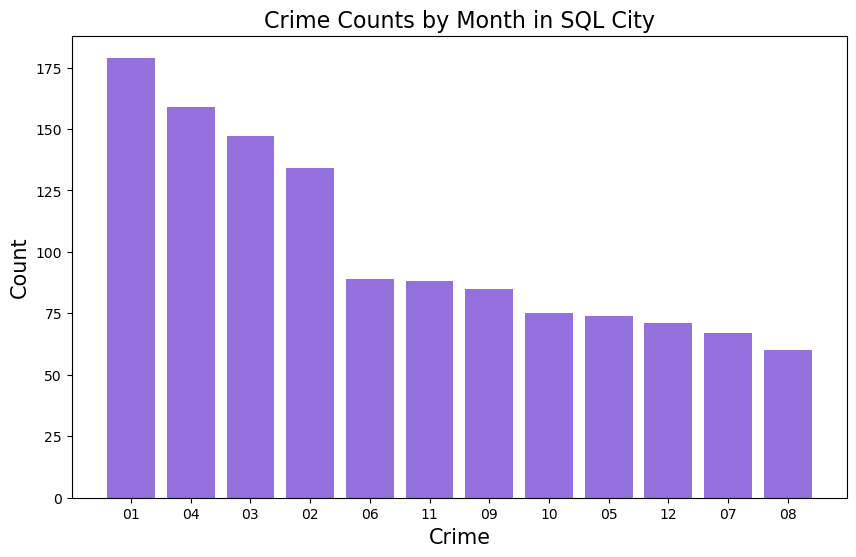

In [171]:
plt.figure(figsize=(10, 6))  # Set the plot size
plt.bar(dates['month'], dates['count'], color='mediumpurple')  # Bar plot where x var is month and y var is count, color is mediumpurple

# Add title and labels. Font size is adjusted because the labels were not easily distinguishable with the default
plt.title('Crime Counts by Month in SQL City', fontsize = 16)
plt.xlabel('Crime', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show() # Display

<b>Answer:</b> January is the month with the most occurences. If the budget is DOUBLING, I would make sure to mention that April and March and not that far behind. 

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [164]:
with engine.connect() as connection:  # Establish a connection
    query = text("""SELECT membership_status, COUNT(*) AS count
                    FROM get_fit_now_member
                    GROUP BY membership_status
                    ORDER BY count DESC
                    """)                      # SELECT membership type column from get fit now member, assign COUNT as count. GROUP BY status and ORDER BY count desc
    # Don't need a limit here because there are only a small amount of types
    mb = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database. 

# Print the results
mb

,membership_status,count
0,gold,68
1,silver,63
2,regular,53


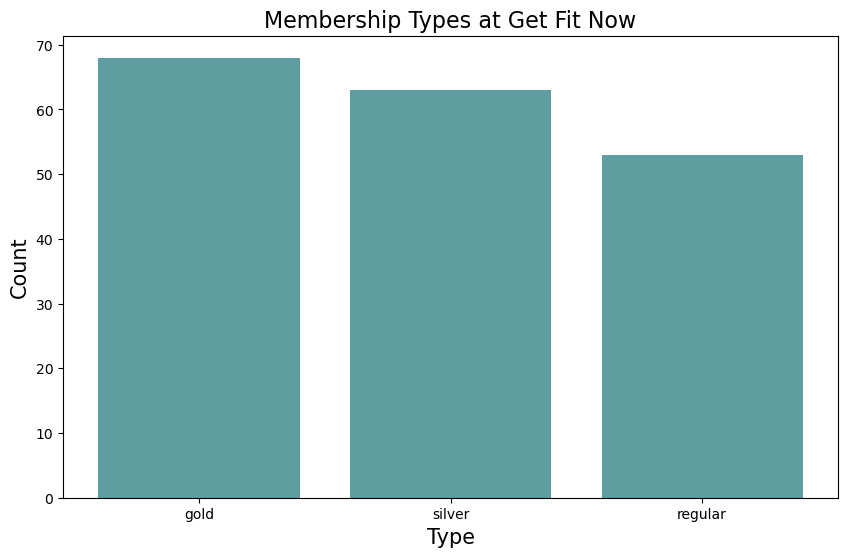

In [172]:
plt.figure(figsize=(10, 6))  # Set the plot size
plt.bar(mb['membership_status'], mb['count'], color='cadetblue')  # Bar plot where x var is type and y var is count, color is cadetblue

# Add title and labels. Font size is adjusted because the labels were not easily distinguishable with the default
plt.title('Membership Types at Get Fit Now', fontsize = 16)
plt.xlabel('Type', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.show() # Display

<b>Answer:</b> The least prevalent membership type is "regular". I would say the "town heroes" maybe should be given gold, though... lol. There is not a dramatic difference between the amount of people with each type of membership. 

In [ ]:
#Disconnect from the database. Always remember to disconnect :) 

connection.close() # Disconnect 